In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

[0]


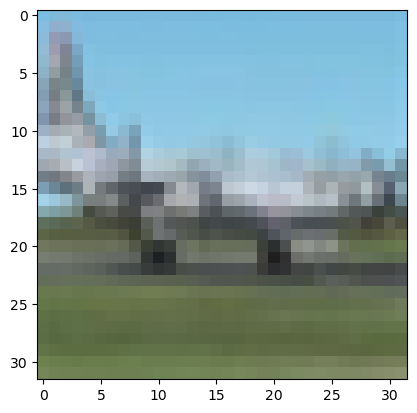

In [5]:
i=1999
plt.imshow(X_train[i])
print(y_train[i])

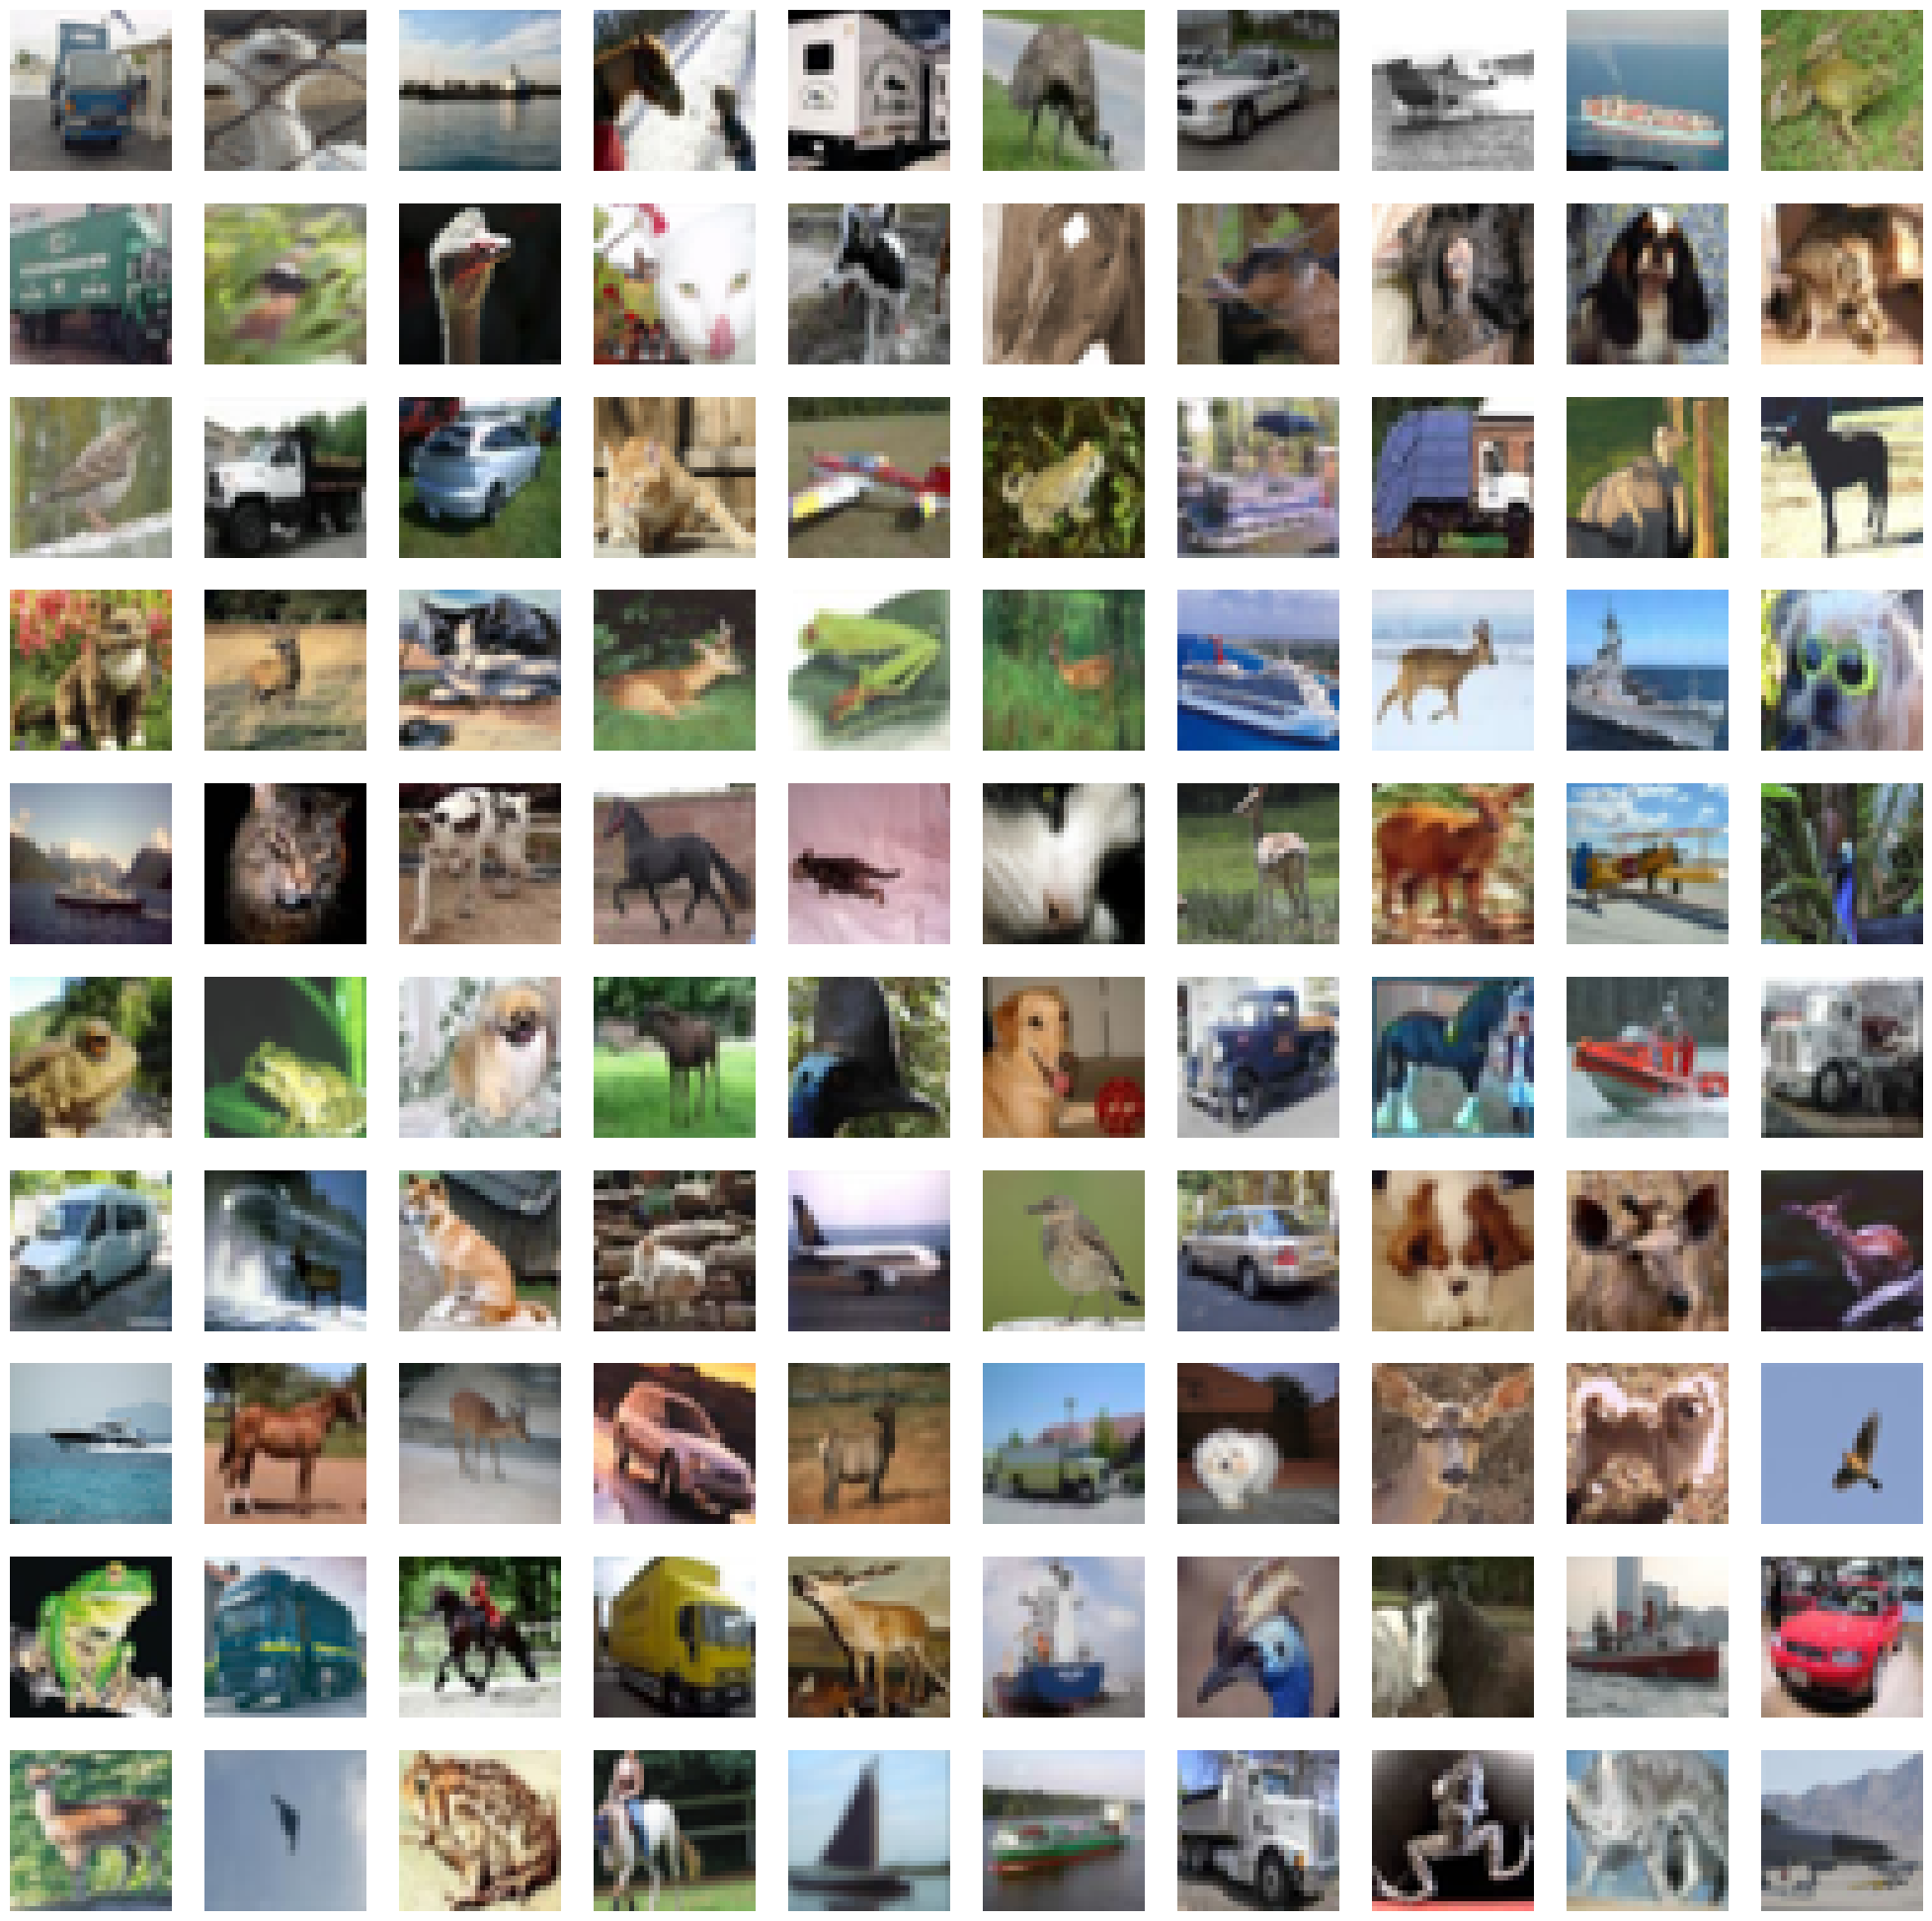

In [6]:
W_grid = 10
L_grid = 10

fig,axes =plt.subplots(L_grid,W_grid,figsize=(25,25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
num_categories =10

In [9]:
import keras
y_train = keras.utils.to_categorical(y_train,num_categories)

In [10]:
y_test = keras.utils.to_categorical(y_test,num_categories)

In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
Input_shape = X_train.shape[1:]

In [16]:
Input_shape

(32, 32, 3)

In [17]:
from keras.models import Sequential
from keras.layers import MaxPooling2D,Dense,AveragePooling2D,Conv2D,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))



C:\Users\kondr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [20]:
history=cnn_model.fit(X_train,y_train,batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 70ms/step - accuracy: 0.3077 - loss: 1.8820
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.5724 - loss: 1.2191
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.6567 - loss: 0.9940
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 0.6957 - loss: 0.9021
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.7132 - loss: 0.8562
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.7242 - loss: 0.8274
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.7348 - loss: 0.8019
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.7411 - loss: 0.8100
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 133ms/step - accuracy: 0.7471 - loss: 0.7890
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.7522 - loss: 0.7699


In [21]:
evaluation = cnn_model.evaluate(X_test,y_test)
print("Test Acuuracy: {}".format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7622 - loss: 0.7651
Test Acuuracy: 0.7601000070571899


In [22]:
predicted_class =np.argmax(cnn_model.predict(X_test),axis=1)
predicted_class

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [23]:
y_test = y_test.argmax(1)

In [24]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

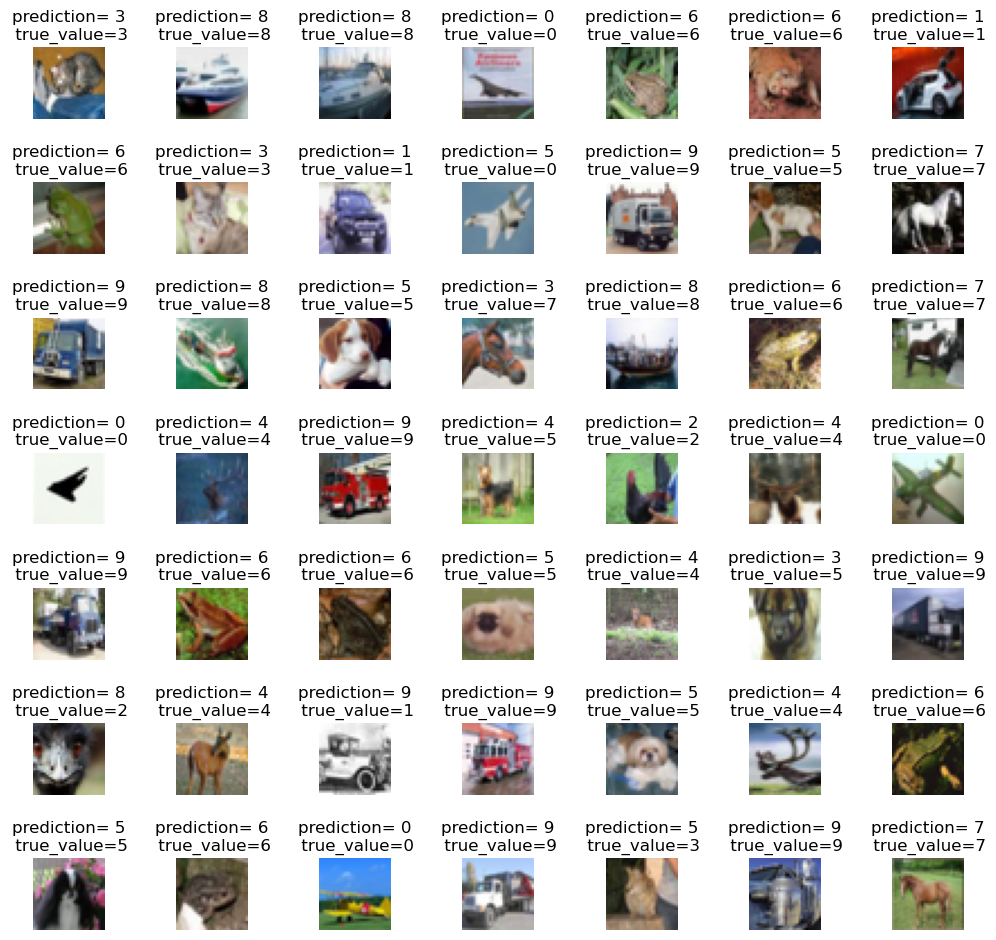

In [25]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction= {}\n true_value={}'.format(predicted_class[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)   

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_class)
cm

array([[787,  28,  25,  20,  10,  16,   5,   7,  73,  29],
       [  5, 901,   1,   3,   2,   6,   3,   0,  22,  57],
       [ 69,   5, 499,  54,  78, 158,  86,  20,  24,   7],
       [ 20,   9,  19, 494,  57, 298,  52,  15,  26,  10],
       [ 12,   1,  27,  50, 728,  81,  34,  48,  15,   4],
       [  7,   5,   5,  76,  33, 818,  19,  21,  10,   6],
       [  8,   5,   4,  52,  27,  50, 838,   3,   9,   4],
       [ 11,   2,   4,  24,  35, 117,  12, 784,   2,   9],
       [ 51,  19,   5,   7,   1,  10,   3,   2, 886,  16],
       [ 25,  47,   3,   9,   2,   9,   6,   6,  27, 866]], dtype=int64)

In [27]:
import os
directory = os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar_10_trained_model.h5')    
cnn_model.save(model_path)

In [28]:
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [29]:
X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
n=10
X_train_sample=X_train[:n]
X_train_sample.shape

(10, 32, 32, 3)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Image_gendata=ImageDataGenerator(rotation_range=90)
Image_gendata.fit(X_train_sample)

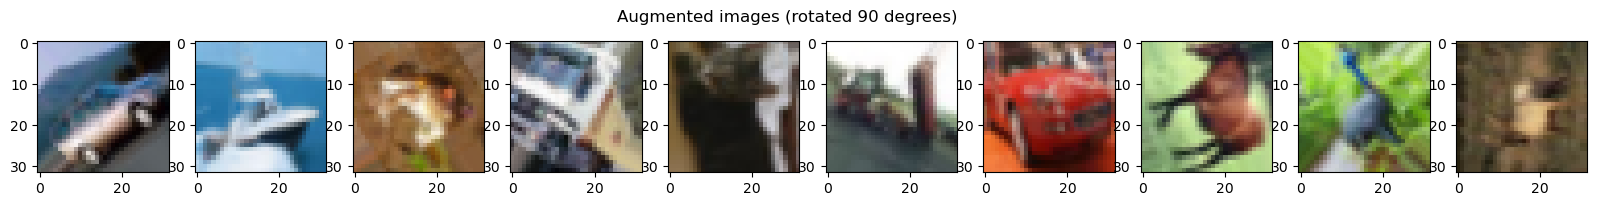

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the figure size
fig = plt.figure(figsize=(20, 2))

# Loop through the batches of data
for x_batch in Image_gendata.flow(X_train_sample, batch_size=n):
    # Convert the data to uint8
    x_batch = x_batch.astype('uint8')

    # Loop through the images in the batch
    for i in range(n):
        # Create a subplot for the current image
        ax = fig.add_subplot(1, n, i + 1)

        # Display the image using imshow
        ax.imshow(Image.fromarray(x_batch[i]))

    # Set the figure title
    fig.suptitle('Augmented images (rotated 90 degrees)')

    # Show the figure
    plt.show()

    # Break out of the loop after displaying one batch
    break

In [ ]:
Image_gendata = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

In [ ]:
Image_gendata.fit(X_train)

In [ ]:
cnn_model.fit(Image.flow(X_train, y_train, batch_size = 32), epochs = 10)

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
import os
directory = os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar_10_trained_model_augumented.h5')    
cnn_model.save(model_path)